# **1. Perkenalan Dataset**




**Sumber Dataset**:  [Diabetes Dataset](https://www.kaggle.com/datasets/hasibur013/diabetes-dataset/data)

Dataset ini berisi data pengukuran diagnostik medis yang dikumpulkan untuk memprediksi kemungkinan terjadinya diabetes berdasarkan beberapa faktor kesehatan. Terdapat 768 data pasien perempuan, masing-masing dengan 8 atribut terkait kesehatan. Variabel Outcome menunjukkan apakah pasien menderita diabetes (1) atau tidak (0). 

**Penjelasan Kolom Dataset:**
- **Pregnancies**: Jumlah kehamilan yang pernah dialami pasien.
- **Glucose**: Konsentrasi glukosa plasma setelah 2 jam tes toleransi glukosa oral.
- **BloodPressure**: Tekanan darah diastolik (mm Hg).
- **SkinThickness**: Ketebalan lipatan kulit trisep (mm).
- **Insulin**: Kadar insulin serum 2 jam (mu U/ml).
- **BMI**: Indeks massa tubuh (berat badan dalam kg/(tinggi badan dalam m)^2).
- **DiabetesPedigreeFunction**: Fungsi yang menunjukkan riwayat diabetes dalam keluarga pasien.
- **Age**: Usia pasien (tahun).
- **Outcome**: Hasil biner (0 atau 1), di mana 1 menunjukkan pasien menderita diabetes dan 0 tidak menderita diabetes.



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('../diabetes_dataset_raw.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
print(f'Jumlah baris: {df.shape[0]}')
print(f'Jumlah kolom: {df.shape[1]}')
print(f'Jumlah kolom yang memiliki nilai null: {df.isnull().sum().sum()}')
print(f'Jumlah kolom yang memiliki nilai duplikat: {df.duplicated().sum()}')

Jumlah baris: 768
Jumlah kolom: 9
Jumlah kolom yang memiliki nilai null: 0
Jumlah kolom yang memiliki nilai duplikat: 0


In [6]:
print(f'Kolom yang memiliki nilai unik: {df.nunique()}')

Kolom yang memiliki nilai unik: Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


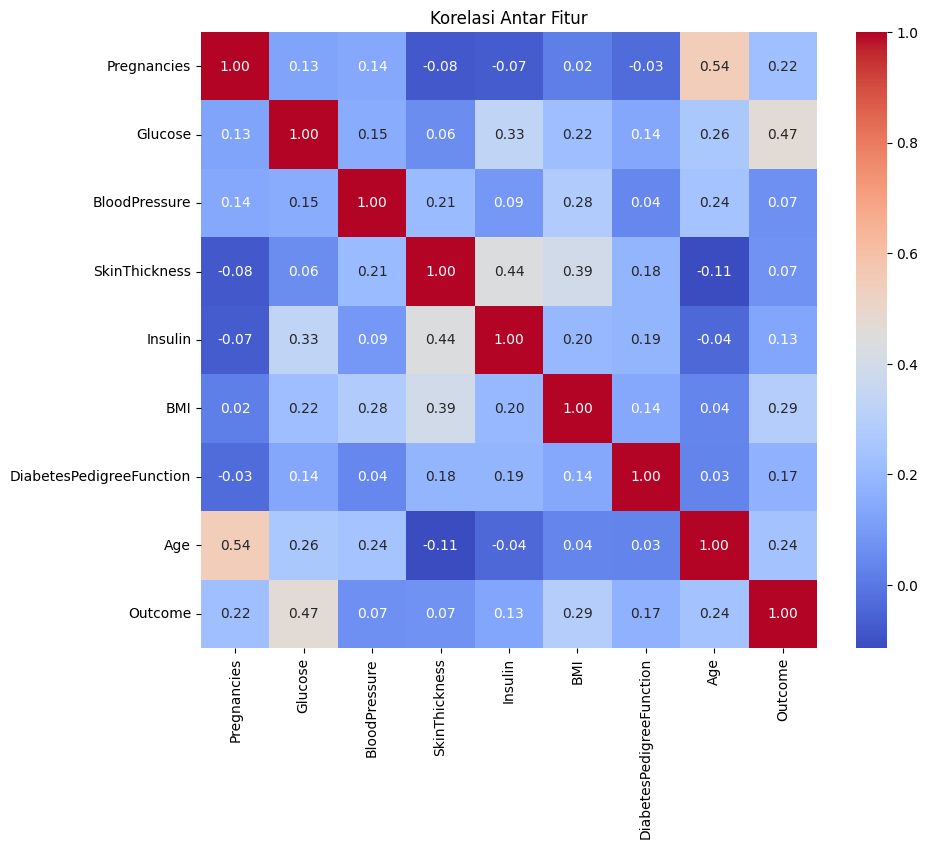

In [7]:
# Cek korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Korelasi Antar Fitur')
plt.show()

/tmp/ipykernel_44911/901546333.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


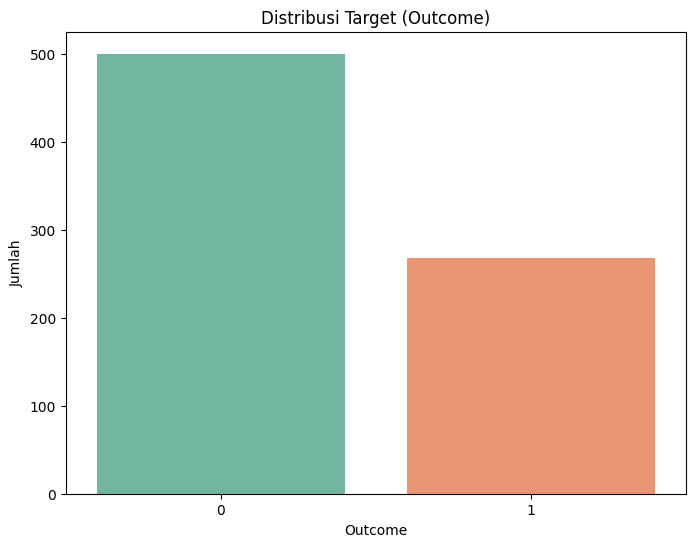

In [8]:
# Cek Distribusi target
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Distribusi Target (Outcome)')
plt.xlabel('Outcome')
plt.ylabel('Jumlah')
plt.show()

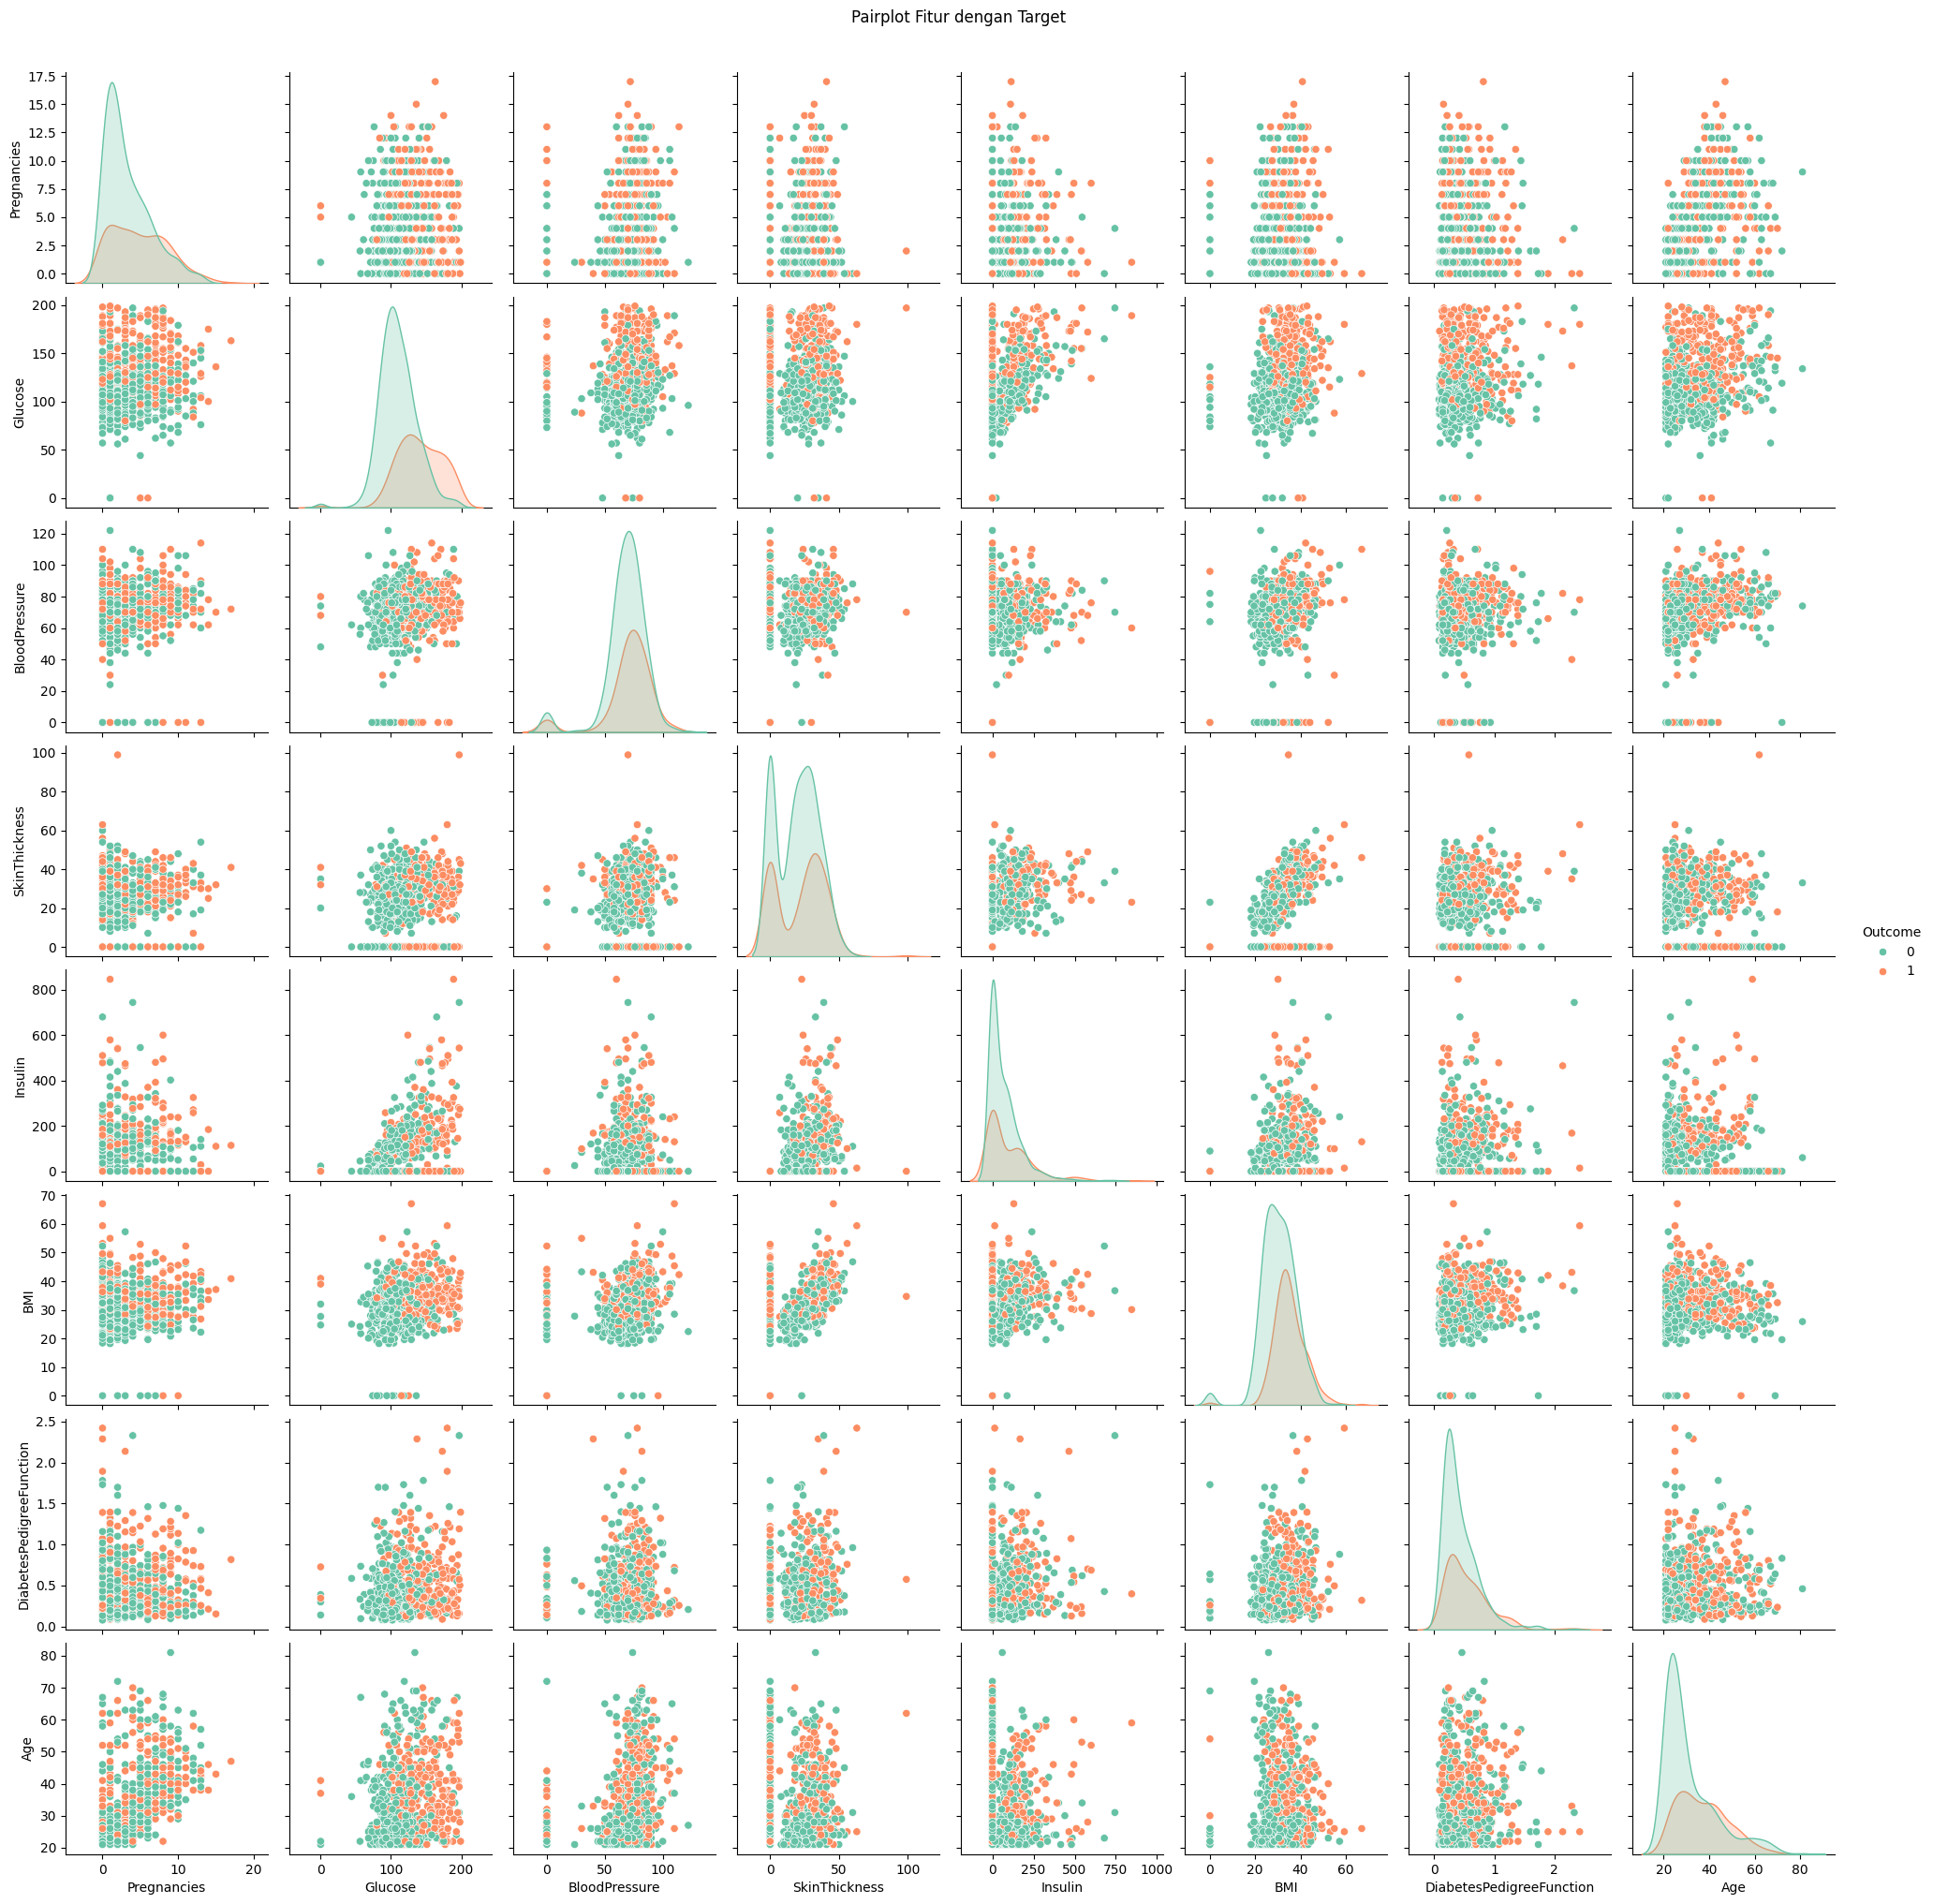

In [9]:
sns.pairplot(df, hue='Outcome', palette='Set2', diag_kind='kde')
plt.suptitle('Pairplot Fitur dengan Target', y=1.02)
plt.show()
# Pisahkan fitur dan target

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:
print(f'Cek jumlah missing values:\n{df.isnull().sum()}')

Cek jumlah missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:
print(f'Cek jumlah data duplikat:\n{df.duplicated().sum()}')

Cek jumlah data duplikat:
0


In [12]:
# Deteksi outlier dengan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]
outliers = {}
for column in df.select_dtypes(include=[np.number]).columns:
    outliers[column] = detect_outliers_iqr(df, column)
print(f'Jumlah outlier per kolom:\n{pd.Series({k: len(v) for k, v in outliers.items()})}')

Jumlah outlier per kolom:
Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


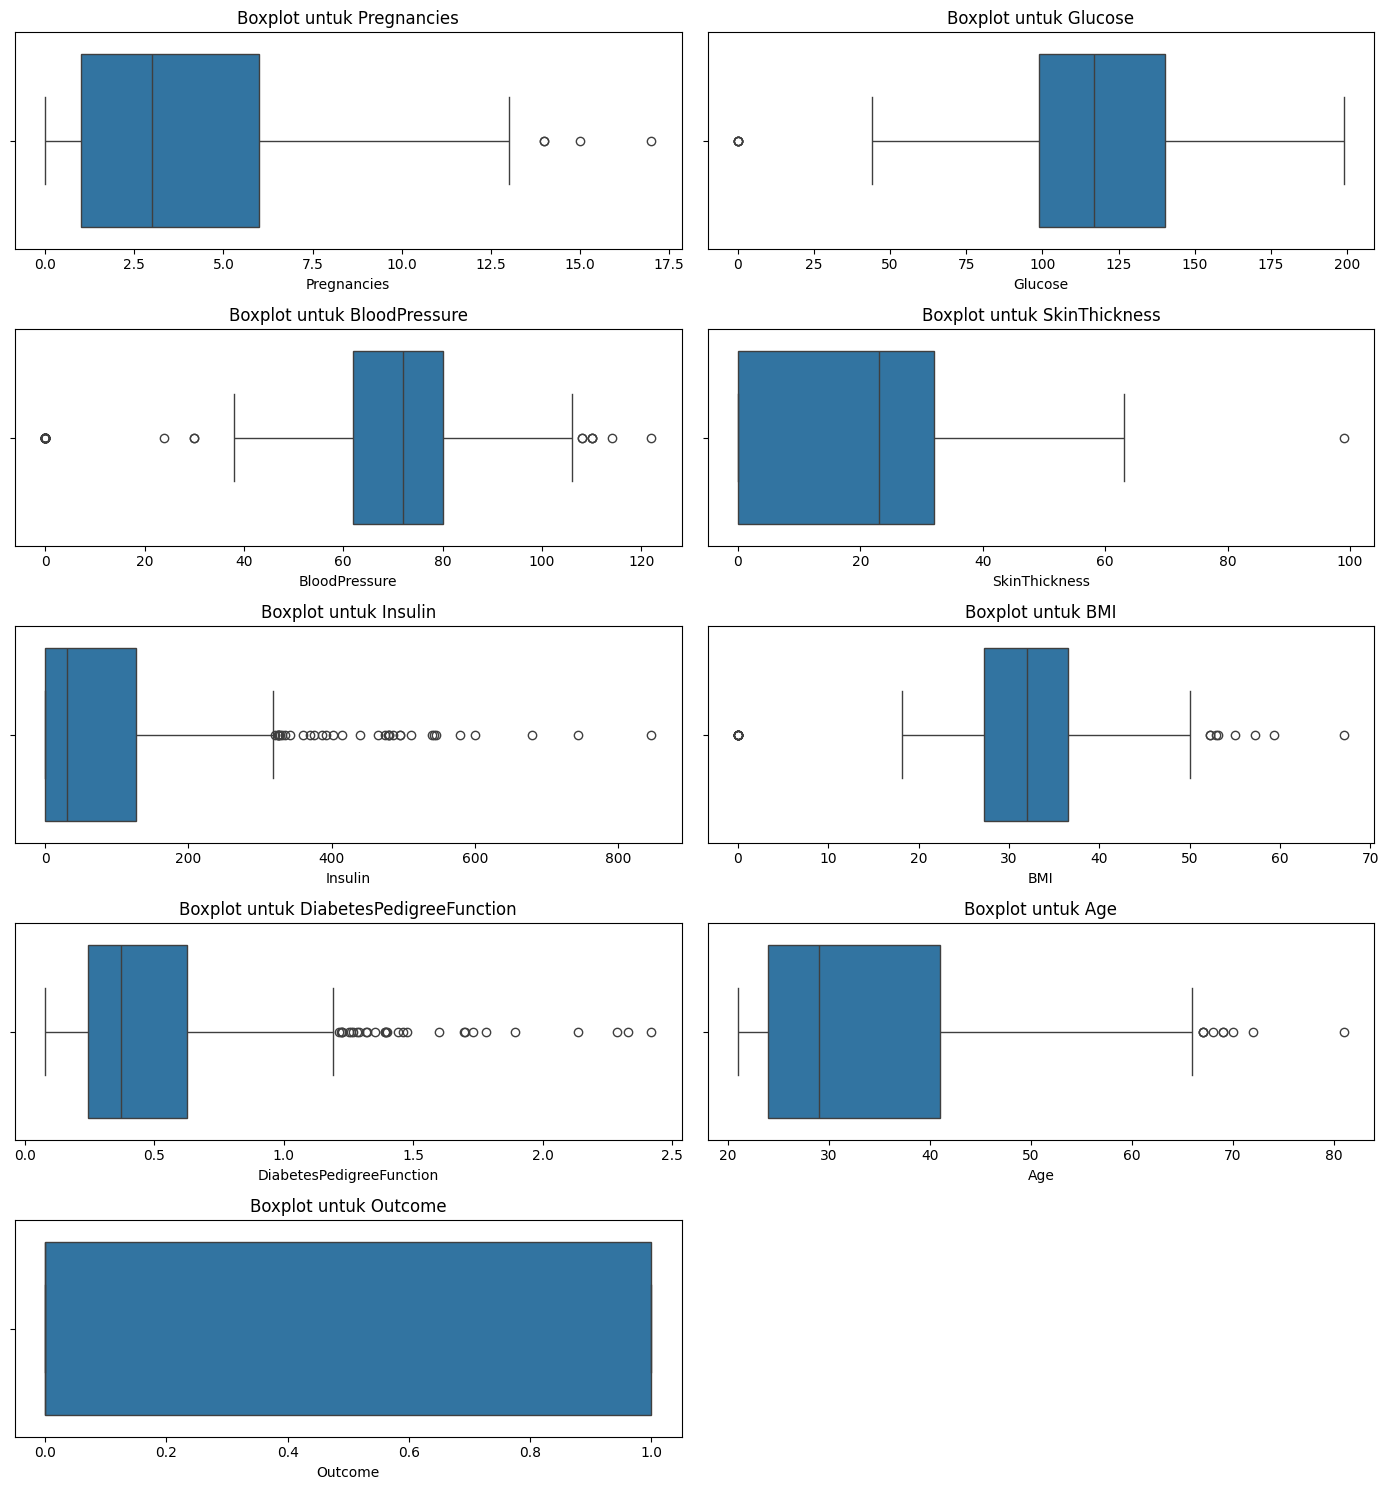

In [13]:
# Visualisasi outlier dalam 2 kolom
num_cols = df.select_dtypes(include=[np.number]).columns
n = len(num_cols)
fig, axes = plt.subplots(nrows=(n + 1) // 2, ncols=2, figsize=(14, 3 * ((n + 1) // 2)))
axes = axes.flatten()

for i, column in enumerate(num_cols):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot untuk {column}')

# Hapus axis kosong jika jumlah kolom ganjil
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
# Handling outliers
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data
for column in df.select_dtypes(include=[np.number]).columns:
    df = handle_outliers_iqr(df, column)

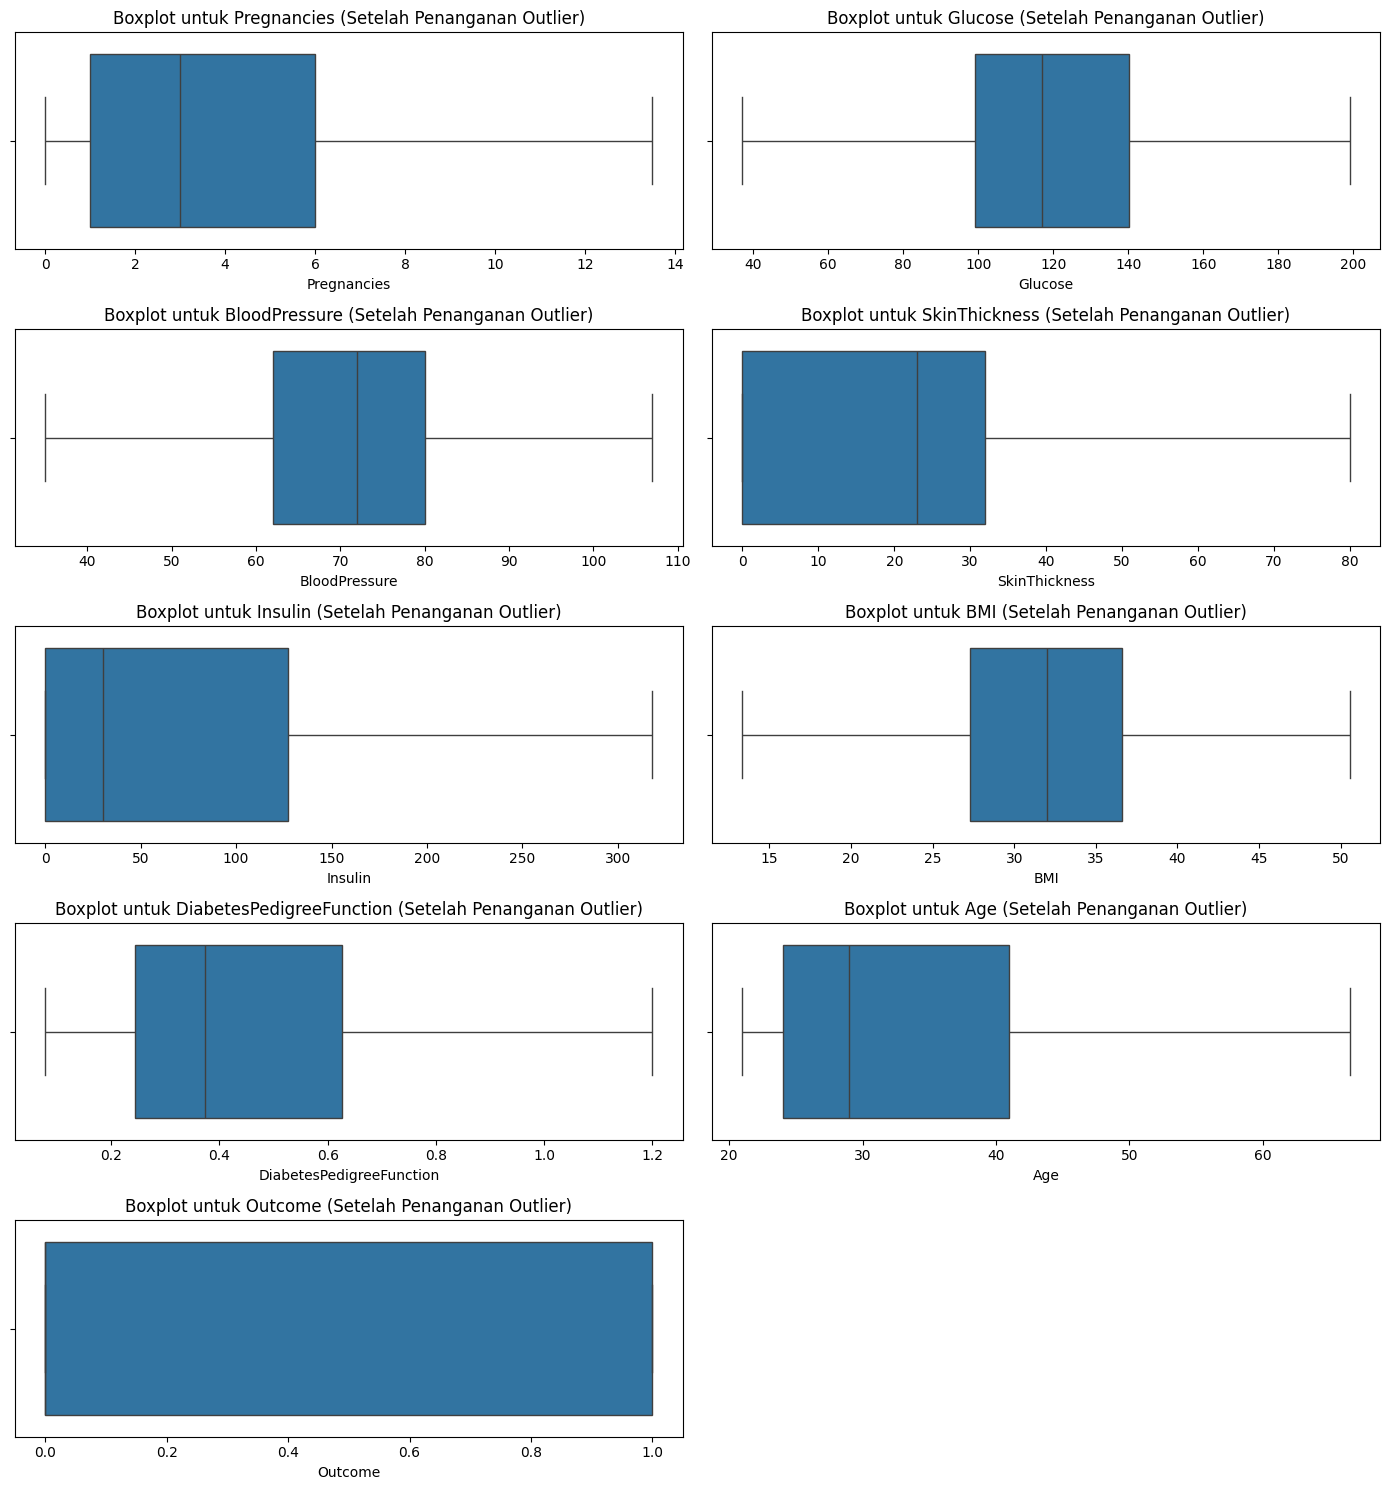

In [15]:
# Visualisasi outlier dalam 2 kolom setelah penanganan outlier
fig, axes = plt.subplots(nrows=(n + 1) // 2, ncols=2, figsize=(14, 3 * ((n + 1) // 2)))
axes = axes.flatten()
for i, column in enumerate(num_cols):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot untuk {column} (Setelah Penanganan Outlier)')
# Hapus axis kosong jika jumlah kolom ganjil
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [ ]:
# Binning kolom BMI
def bin_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'
df['BMI_Category'] = df['BMI'].apply(bin_bmi)

In [ ]:
X = df.drop(columns=['Outcome','BMI'])
y = df['Outcome']

In [18]:
catgorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=[np.number]).columns

In [19]:
# Encoding categorical features
le = LabelEncoder()
X = X.copy()
for col in catgorical_cols:
    X[col] = le.fit_transform(X[col])

In [20]:
# Scaling numeric features
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)